In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "titanic"

In [2]:
data <- read.csv('../input/titanic/train.csv')

In [3]:
data$Survived[data$Survived == 0] <- "died"
data$Survived[data$Survived == 1] <- "lived"
data$Survived<- as.factor(data$Survived)
data$Sex <- as.factor(data$Sex)
data$Embarked <- as.factor(data$Embarked)




In [4]:
data

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<fct>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<fct>
1,died,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,lived,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,lived,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,lived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,died,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,died,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,died,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,died,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,lived,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [5]:
data$Pclass <- as.factor(data$Pclass)
data$Cabin <- as.factor(data$Cabin)
data <- subset(data,select=-c(Name,Ticket,Cabin))


In [6]:
data <- na.omit(data)

In [7]:
rawdata <- read.csv('../input/titanic/train.csv')

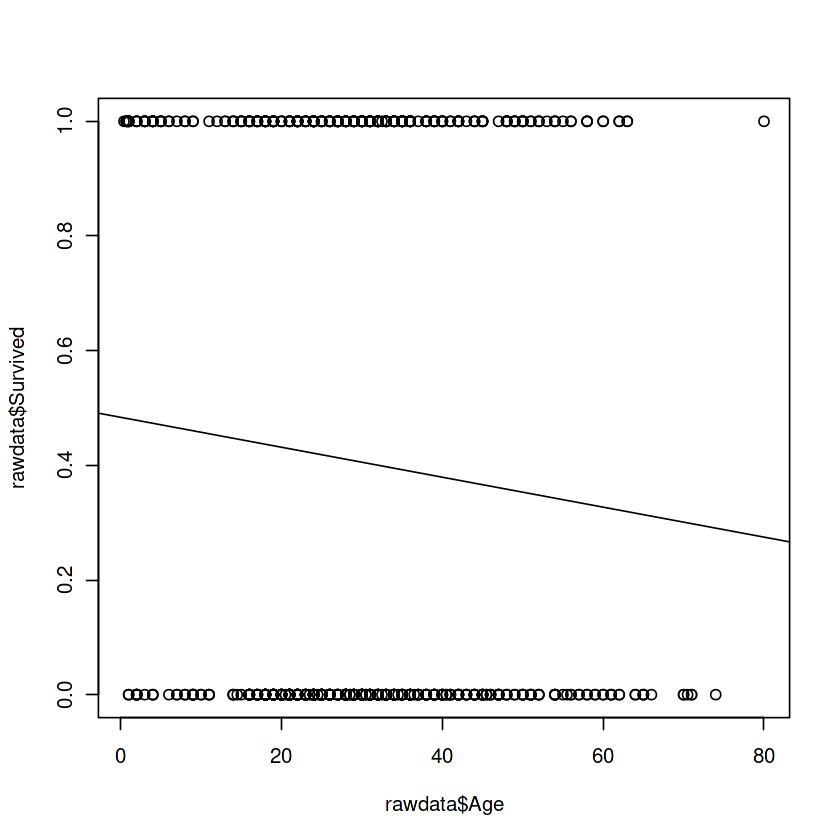

In [8]:
plot(rawdata$Age, rawdata$Survived)
abline(lm(rawdata$Survived ~ rawdata$Age))

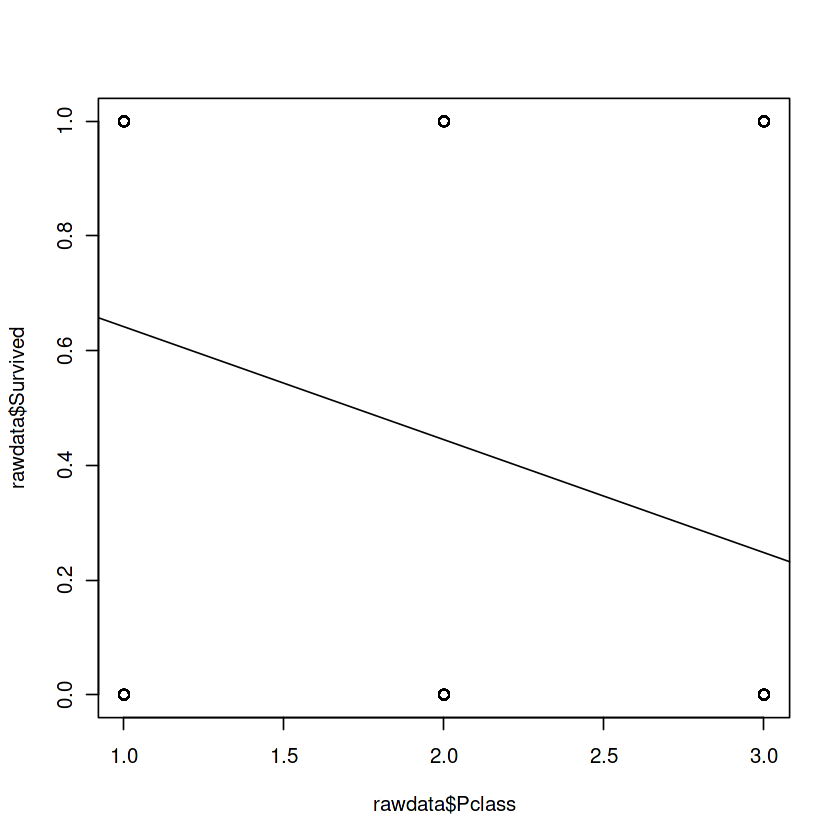

In [9]:
plot(rawdata$Pclass, rawdata$Survived)
abline(lm(rawdata$Survived ~ rawdata$Pclass))

In [10]:
library(caret)
library(rpart.plot)
control <- trainControl(method = 'cv', number = 10)
metric <- 'Accuracy'

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: rpart



In [11]:
set.seed(69)
fit.rpart <- train(Survived~., data = data, method = 'rpart',na.action = na.pass)

In [12]:
print(fit.rpart)

CART 

714 samples
  8 predictor
  2 classes: 'died', 'lived' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 714, 714, 714, 714, 714, 714, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02758621  0.7894938  0.5479338
  0.02931034  0.7858003  0.5403382
  0.45862069  0.6913398  0.2840714

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02758621.


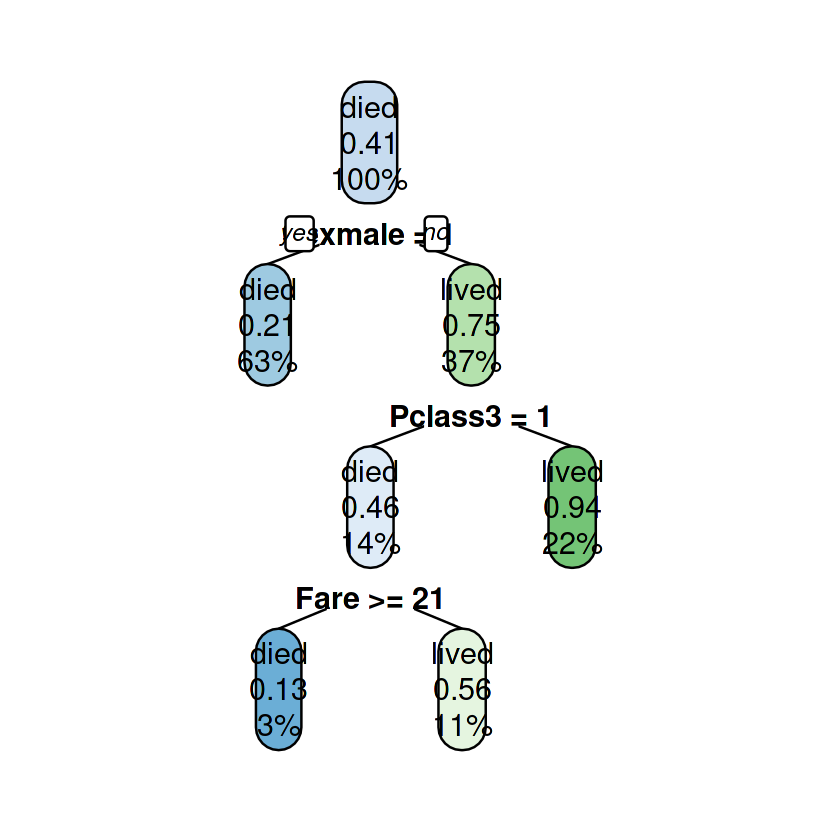

In [13]:
rpart.plot(fit.rpart$finalModel,fallen.leaves = F,tweak = 1.5,compress = T)

In [14]:
test <- read.csv('../input/titanic/test.csv')
test$Survived[test$Survived == 0] <- "died"
test$Survived[test$Survived == 1] <- "lived"
test$Survived<- as.factor(test$Survived)
test$Sex <- as.factor(test$Sex)
test$Embarked <- as.factor(test$Embarked)

test$Pclass <- as.factor(test$Pclass)
test$Cabin <- as.factor(test$Cabin)
test <- subset(test,select=-c(Name,Ticket,Cabin))


ERROR: Error in `$<-.data.frame`(`*tmp*`, Survived, value = character(0)): replacement has 0 rows, data has 418


In [ ]:
predictions <- predict(fit.rpart, test)